# DAVID Analysis of DEGs between ensemble risk groups (present in all repeats)

## Note* EASE threshold of 0.01 and count threshold of 10 was used

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

,Category,Term,Genes,Count,List Total,Pop Hits,Pop Total,P-Value,Benjamini,Fold Enrichment,Bonferroni,FDR,Fisher Exact
0,GOTERM_CC_DIRECT,extracellular region,20.04%,202,963,1324,13785,2.600000e-28,1.610000e-25,2.18,1.610000e-25,1.530000e-25,1.080000e-28
1,GOTERM_CC_DIRECT,collagen-containing extracellular matrix,7.94%,80,963,316,13785,1.980000e-24,6.140000e-22,3.62,1.230000e-21,5.820000e-22,4.400000e-25
2,GOTERM_CC_DIRECT,extracellular space,16.17%,163,963,1035,13785,4.650000e-24,9.620000e-22,2.25,2.890000e-21,9.130000e-22,1.870000e-24
3,GOTERM_MF_DIRECT,extracellular matrix structural constituent,4.07%,41,939,108,13590,1.010000e-19,1.150000e-16,5.49,1.150000e-16,1.130000e-16,1.240000e-20
4,GOTERM_CC_DIRECT,cell surface,8.93%,90,963,493,13785,2.680000e-17,4.160000e-15,2.61,1.660000e-14,3.940000e-15,9.020000e-18


In [ ]:
df_GO_KEGG = pd.read_csv("./DAVID_UP_GO-Direct.csv")

BP_df = df_GO_KEGG[df_GO_KEGG["Category"] == "GOTERM_BP_DIRECT"]
BP_df = BP_df[BP_df["FDR"]<=0.01]
BP_df["-Log10(FDR)"] = -np.log10(BP_df["FDR"])
BP_df.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

CC_df = df_GO_KEGG[df_GO_KEGG["Category"] == "GOTERM_CC_DIRECT"]
CC_df = CC_df[CC_df["FDR"]<=0.01]
CC_df["-Log10(FDR)"] = -np.log10(CC_df["FDR"])
CC_df.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

MF_df = df_GO_KEGG[df_GO_KEGG["Category"] == "GOTERM_MF_DIRECT"]
MF_df = MF_df[MF_df["FDR"]<=0.01]
MF_df["-Log10(FDR)"] = -np.log10(MF_df["FDR"])
MF_df.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

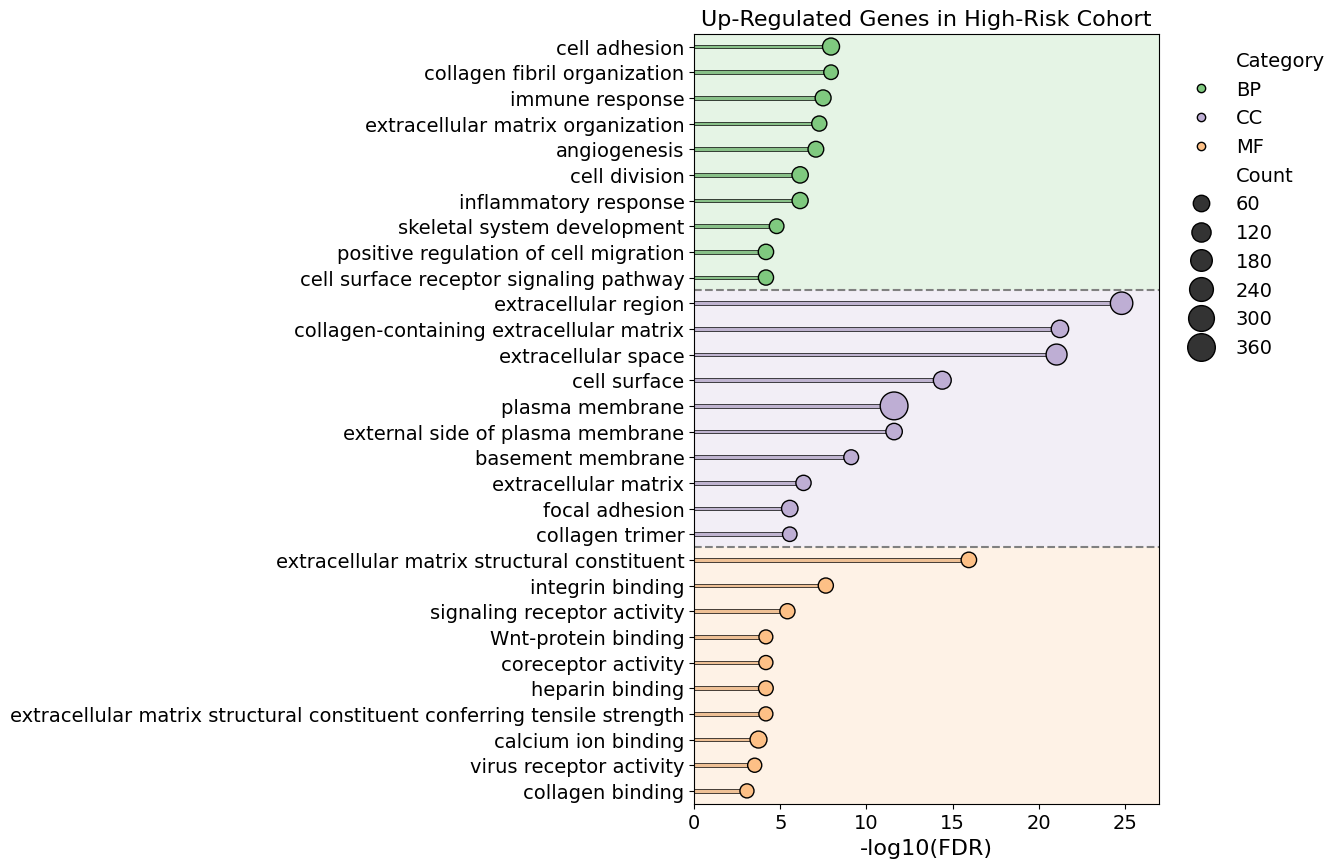

In [ ]:
GO_df = pd.concat([BP_df[:10],CC_df[:10],MF_df[:10]])
GO_df.replace({"GOTERM_BP_DIRECT":"BP","GOTERM_CC_DIRECT":"CC","GOTERM_MF_DIRECT":"MF"},inplace=True)
ax = plt.figure(figsize=(6,10))
ax = sns.barplot(GO_df,y="Term",x="-Log10(FDR)",width=0.15,hue="Category",palette='Accent',legend=False,linewidth=0.5,edgecolor="black",zorder=1)
ax = sns.scatterplot(GO_df,y="Term",x="-Log10(FDR)",size="Count",sizes=(100,400),edgecolor="black",hue="Category",palette='Accent',linewidth=1,zorder=1)
ax.set_ylabel("")
ax.set_xlabel("-log10(FDR)",fontsize=16)
ax.add_patch(patches.Rectangle((0,-0.5),27,10,facecolor="#7FC97F",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,9.5),27,10,facecolor="#BEAED4",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,19.5),27,10,facecolor="#FDC086",alpha=0.2,zorder=0))
ax.tick_params(axis="both",labelsize=14)
plt.title("Up-Regulated Genes in High-Risk Cohort",fontsize=16)
plt.margins(0)
plt.axhline(y=9.5,color="grey",linestyle='--',zorder=0)
plt.axhline(y=19.5,color="grey",linestyle='--',zorder=0)
plt.legend(bbox_to_anchor=(1.01,1),loc="upper left",frameon=False,fontsize=14)

In [23]:
df_Fat = pd.read_csv("./DAVID_UP_GO-Fat.csv")

BP_df_Fat = df_Fat[df_Fat["Category"] == "GOTERM_BP_FAT"]
BP_df_Fat = BP_df_Fat[BP_df_Fat["FDR"]<=0.01]
BP_df_Fat["-Log10(FDR)"] = -np.log10(BP_df_Fat["FDR"])
BP_df_Fat.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

CC_df_Fat = df_Fat[df_Fat["Category"] == "GOTERM_CC_FAT"]
CC_df_Fat = CC_df_Fat[CC_df_Fat["FDR"]<=0.01]
CC_df_Fat["-Log10(FDR)"] = -np.log10(CC_df_Fat["FDR"])
CC_df_Fat.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

MF_df_Fat = df_Fat[df_Fat["Category"] == "GOTERM_MF_FAT"]
MF_df_Fat = MF_df_Fat[MF_df_Fat["FDR"]<=0.01]
MF_df_Fat["-Log10(FDR)"] = -np.log10(MF_df_Fat["FDR"])
MF_df_Fat.sort_values(by="-Log10(FDR)",inplace=True,ascending=False)

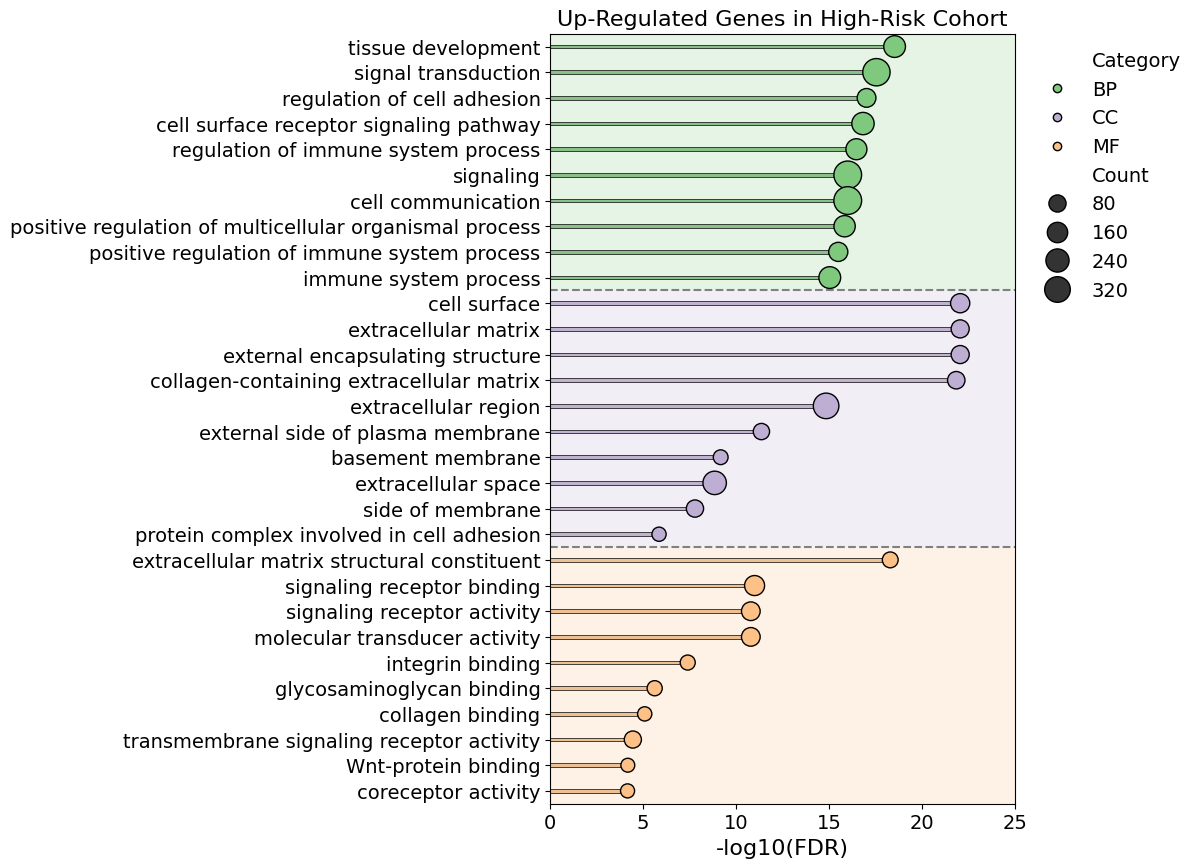

In [27]:
GO_df_Fat = pd.concat([BP_df_Fat[:10],CC_df_Fat[:10],MF_df_Fat[:10]])
GO_df_Fat.replace({"GOTERM_BP_FAT":"BP","GOTERM_CC_FAT":"CC","GOTERM_MF_FAT":"MF"},inplace=True)
ax = plt.figure(figsize=(6,10))
ax = sns.barplot(GO_df_Fat,y="Term",x="-Log10(FDR)",width=0.15,hue="Category",palette='Accent',legend=False,linewidth=0.5,edgecolor="black",zorder=1)
ax = sns.scatterplot(GO_df_Fat,y="Term",x="-Log10(FDR)",size="Count",sizes=(100,400),edgecolor="black",hue="Category",palette='Accent',linewidth=1,zorder=1)
ax.set_ylabel("")
ax.set_xlabel("-log10(FDR)",fontsize=16)
ax.add_patch(patches.Rectangle((0,-0.5),25,10,facecolor="#7FC97F",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,9.5),25,10,facecolor="#BEAED4",alpha=0.2,zorder=0))
ax.add_patch(patches.Rectangle((0,19.5),25,10,facecolor="#FDC086",alpha=0.2,zorder=0))
ax.tick_params(axis="both",labelsize=14)
plt.title("Up-Regulated Genes in High-Risk Cohort",fontsize=16)
plt.margins(0)
plt.axhline(y=9.5,color="grey",linestyle='--',zorder=0)
plt.axhline(y=19.5,color="grey",linestyle='--',zorder=0)
plt.legend(bbox_to_anchor=(1.01,1),loc="upper left",frameon=False,fontsize=14)